## a) How can we predict the price of a car? 
## b) How does brand play a part in affecting car prices?

---



## Importing Important Modules 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

## Importing CSV File

We are going to import the csv file, Clean sgcarmart dataset as of 24Mar2022.  
It was derived from (Error Free) sgcarmart after cleaning.  
You may refer to the CleaningDataSet on the cleaning process.

In [2]:
df = pd.read_csv('Clean sgcarmart dataset as of 24MAR2022.csv')

## Exploratory Data Analysis (EDA)

In this part, exploratory data analysis on our dataset is performed.  
Here is a glimpse of how the dataset looks like.

In [3]:
df.head()

,CarID,CarName,CarAge,Price,Depreciation,Mileage,Road Tax,Dereg Value,COE,Engine Cap,Curb Weight,Type of Vehicle,Reg Date,COE Expiry Date,COE Duration,Transmission,OMV,ARF,Power,No of Owners
0,1081489,Volvo V40 T4 R-Design,990,115800,14120,17000,1176,44075,34000,1969,1454,Hatchback,2019-07-08,2029-07-07,2662,Auto,24074,25704,140.0,1
1,1070886,Land Rover Range Rover Sport Diesel 3.0A 7-Seater,1973,188888,27100,133000,3376,115977,56956,2993,2183,SUV,2016-10-28,2026-10-27,1678,Auto,86985,128573,225.0,2
2,1082885,Volvo XC60 T5 Momentum,1281,170000,22680,58000,1176,54933,32311,1969,1841,SUV,2018-09-20,2028-09-19,2371,Auto,38070,45298,187.0,1
3,1080087,Toyota Voxy 2.0A X,4928,68888,10580,176000,1674,21727,33377,1986,1560,MPV,2008-09-25,2028-09-24,2376,Auto,22387,22387,105.0,4
4,1079487,Audi A3 Sedan 1.4A TFSI CoD S-tronic,1227,100800,13290,96775,624,40187,32302,1395,1320,Luxury Sedan,2018-11-13,2028-11-12,2425,Auto,23548,24968,110.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8008 entries, 0 to 8007
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CarID            8008 non-null   int64  
 1   CarName          8008 non-null   object 
 2   CarAge           8008 non-null   int64  
 3   Price            8008 non-null   int64  
 4   Depreciation     8008 non-null   int64  
 5   Mileage          8008 non-null   int64  
 6   Road Tax         8008 non-null   int64  
 7   Dereg Value      8008 non-null   int64  
 8   COE              8008 non-null   int64  
 9   Engine Cap       8008 non-null   int64  
 10  Curb Weight      8008 non-null   int64  
 11  Type of Vehicle  8008 non-null   object 
 12  Reg Date         8008 non-null   object 
 13  COE Expiry Date  8008 non-null   object 
 14  COE Duration     8008 non-null   int64  
 15  Transmission     8008 non-null   object 
 16  OMV              8008 non-null   int64  
 17  ARF           

We are going to convert Reg Date and COE Expiry Date to their respective types.

In [5]:
df = df.astype({'Reg Date' : 'datetime64[ns]', 'COE Expiry Date' : 'datetime64[ns]'})

As seen, our dataset contains 8008 data points, and 20 columns.  
The description of each column can be viewed below.

### Description of Dataset

> CarID : ID of each Car (You can check the car listing through https://www.sgcarmart.com/used_cars/info.php?ID=?)  
> CarName : Name of each Car  
> CarAge : Age of Car in days (Measured from Reg Date)  
> Price : Price of Car in SGD  
> Depreciation : Amount the owner loses on the value of the Car per year in SGD  
> Mileage : Number of kilometres travelled  
> Road Tax : Amount of road tax per year in SGD  
> Dereg Value : (Deregistration Value) Amount one will get back from the government upon deregistering the vehicle for use in Singapore in SGD  
> COE : Original value of the COE when the Car is first registered in SGD  
> Engine Cap : Total volume in engine in cc  
> Curb Weight : Weight (mass) of the Car when not loaded with either passengers or cargo in kg  
> Type of Vehicle : Vehicle Category  
> Reg Date : Date of Car registration (YYYY/MM/DD)  
> COE Expiry Date : Date when COE expires (YYYY/MM/DD)  
> COE Duration : Duration of COE in days (Calculated from COE Expiry Date)  
> Transmission : Either Automatic or Manual  
> OMV : (Open Market Value) Value of Car when first registered.  
> ARF : (Additional Registration Fee) Value of tax imposed upon registration of a vehicle. It is calculated based on a percentage of the Open Market Value (OMV) of the vehicle.  
> Power : Power of Car in kW  
> No of Owners : The number of past owners for this vehicle (Including the current)

### Categorising the Types of Variables

Categorical: CarName, Type of Vehicle, Transmission

Numerical: CarID, CarAge, Price, Depreciation, Mileage, Road Tax, Dereg Value, COE, Engine Cap, Curb Weight, COE Duration, OMV, ARF, Power, No of Owners

TimeSeries: Reg Date, COE Expiry Date

### Plotting pairplots of Numerical Variables

In [6]:
array = []

for column in df:
    if df[column].dtypes == 'int64' or df[column].dtypes == 'float64':
        array.append(column)

In [7]:
array.remove('CarID')
array.remove('Price')

In [8]:
split = np.array_split(array,5)

In [9]:
plot1 = pd.DataFrame(df[split[0]])
plot2 = pd.DataFrame(df[split[1]])
plot3 = pd.DataFrame(df[split[2]])
plot4 = pd.DataFrame(df[split[3]])
plot5 = pd.DataFrame(df[split[4]])

In [10]:
plot1 = pd.concat([plot1, df['Price']], axis = 1)
plot2 = pd.concat([plot2, df['Price']], axis = 1)
plot3 = pd.concat([plot3, df['Price']], axis = 1)
plot4 = pd.concat([plot4, df['Price']], axis = 1)
plot5 = pd.concat([plot5, df['Price']], axis = 1)

Pairplot of CarAge, Depreciation, Mileage and Price

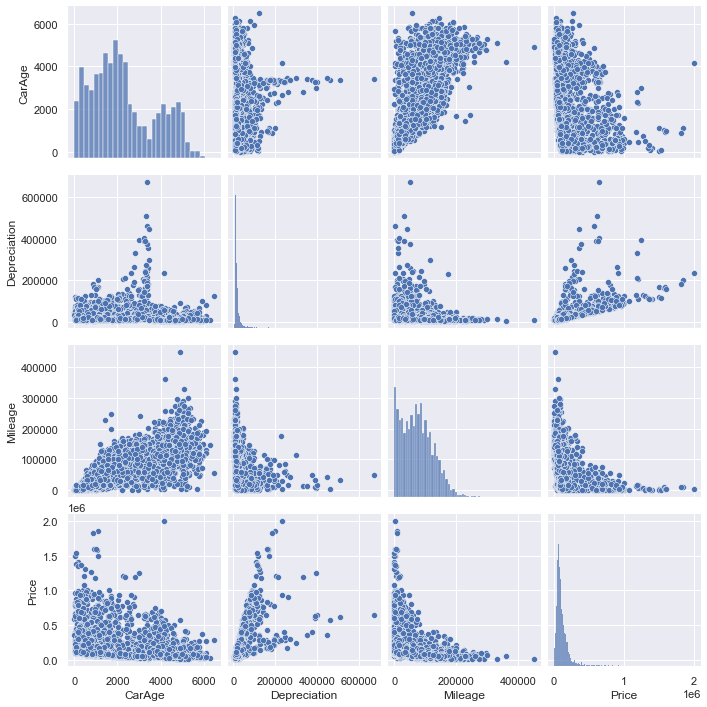

In [11]:
sb.pairplot(data = plot1)

Pairplot of Road Tax, Dereg Value, COE and Price

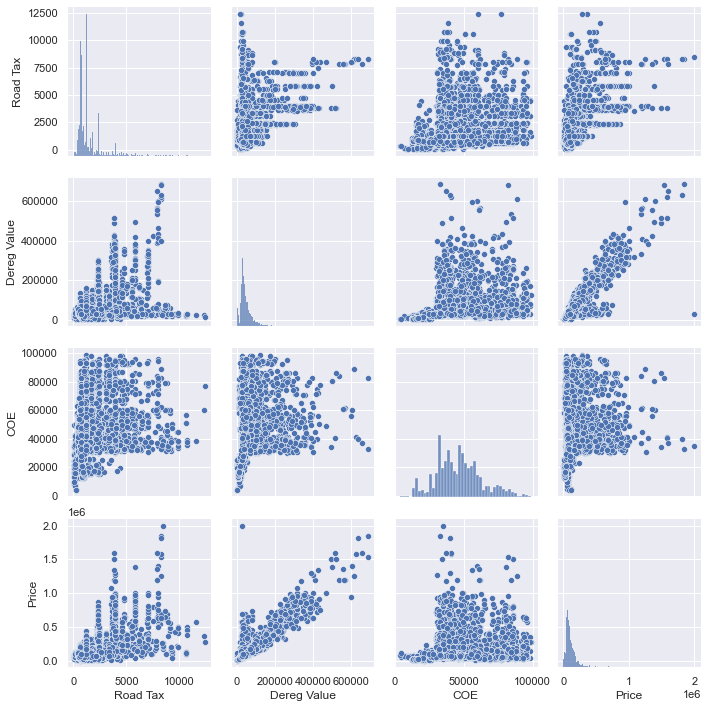

In [12]:
sb.pairplot(data = plot2)

Pairplot of Engine Cap, Curb Weight, COE Duration and Price

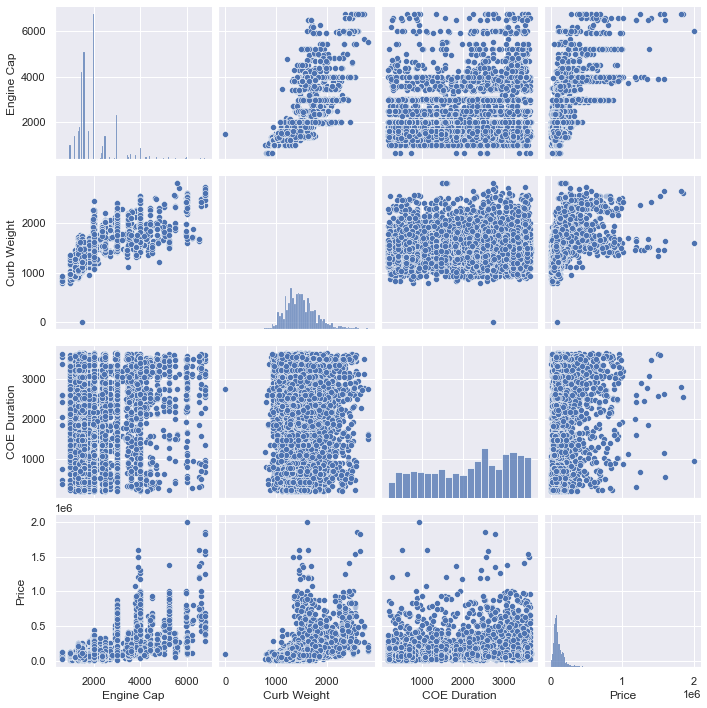

In [13]:
sb.pairplot(data = plot3)

Pairplot of OMV, ARF and Price

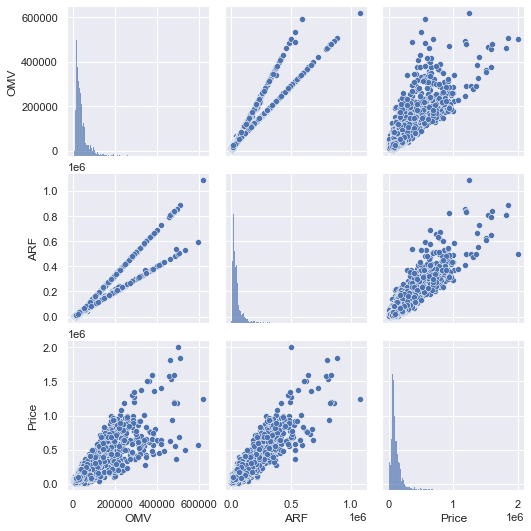

In [14]:
sb.pairplot(data = plot4)

Pairplot of Power, No of Owners and Price

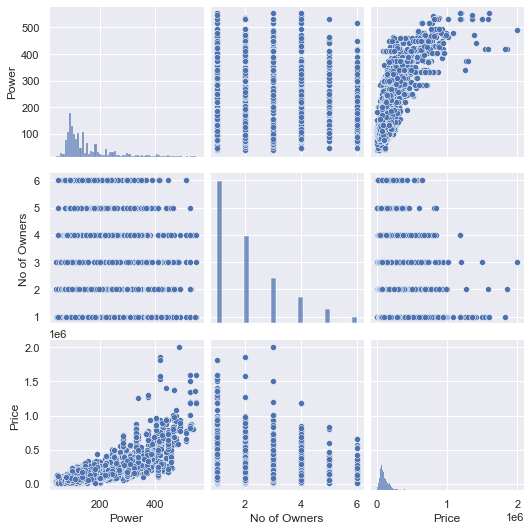

In [15]:
sb.pairplot(data = plot5)

From the pairplots, we can observe that deregistration value and additional registration fee have a strong correlation with Price. On the hand, Open Market Value and Power seems to have a moderately strong correlation with Price.

### Plotting Histograms of Numerical Variables

In [16]:
array.append('Price')
split = np.array_split(array,3)
hist_plot1 = pd.DataFrame(df[split[0]])
hist_plot2 = pd.DataFrame(df[split[1]])
hist_plot3 = pd.DataFrame(df[split[2]])

Histogram of CarAge, Depreciation, Mileage, Road Tax, Dereg Value

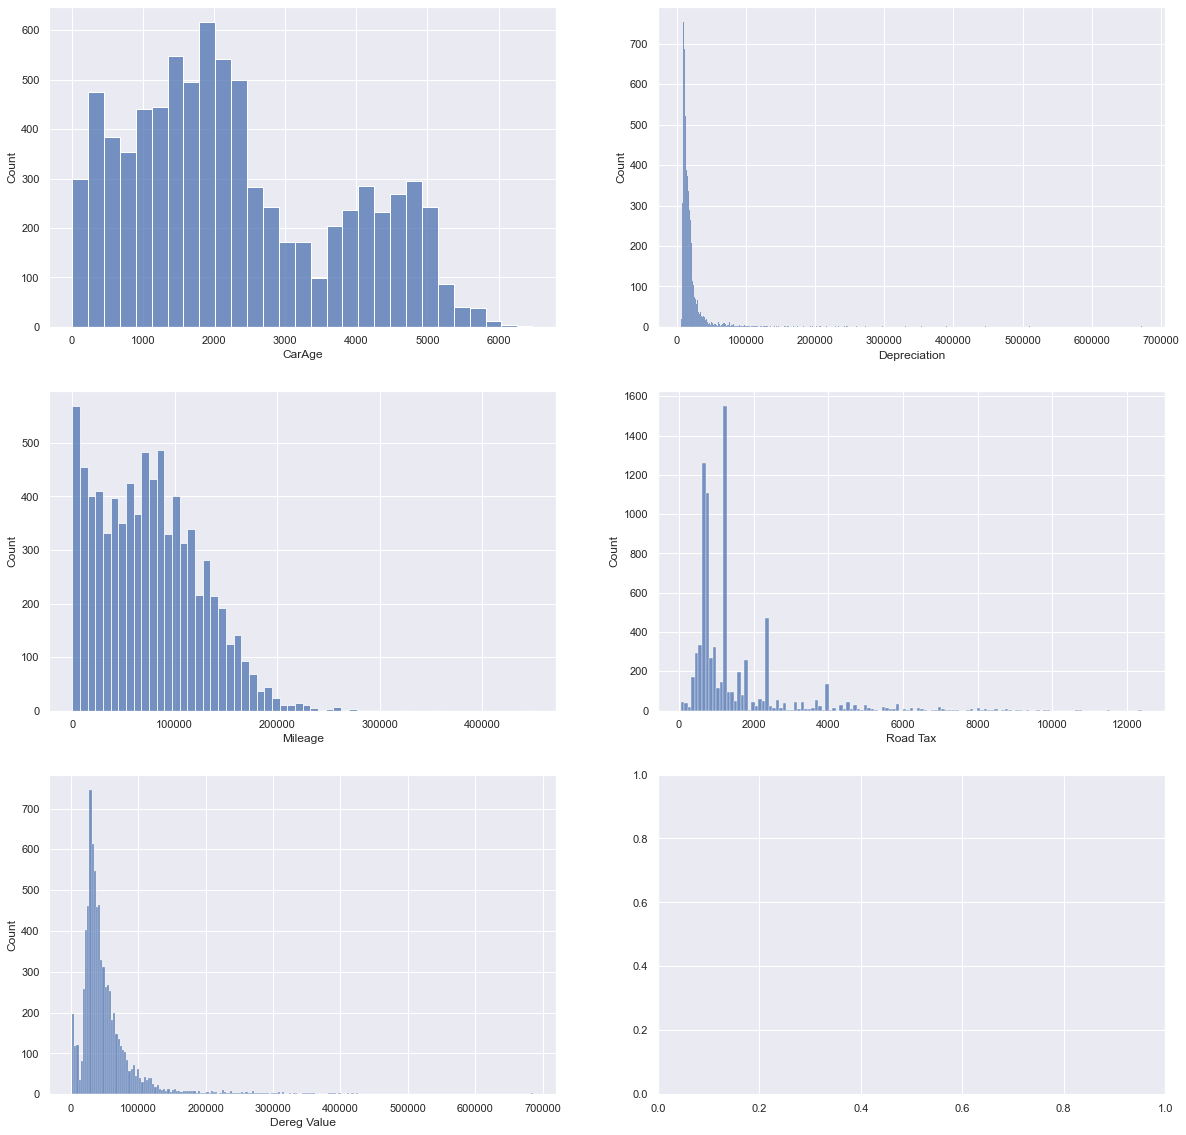

In [17]:
f, axes = plt.subplots(3, 2, figsize=(20, 20))
row = 0
column = 0

for col in hist_plot1:
    if column == 2:
        row += 1
        column = 0
    sb.histplot(data = hist_plot1, x = col, ax = axes[row,column])
    column += 1

Histogram of COE, Engine Cap, Curb Weight, COE Duration, OMV

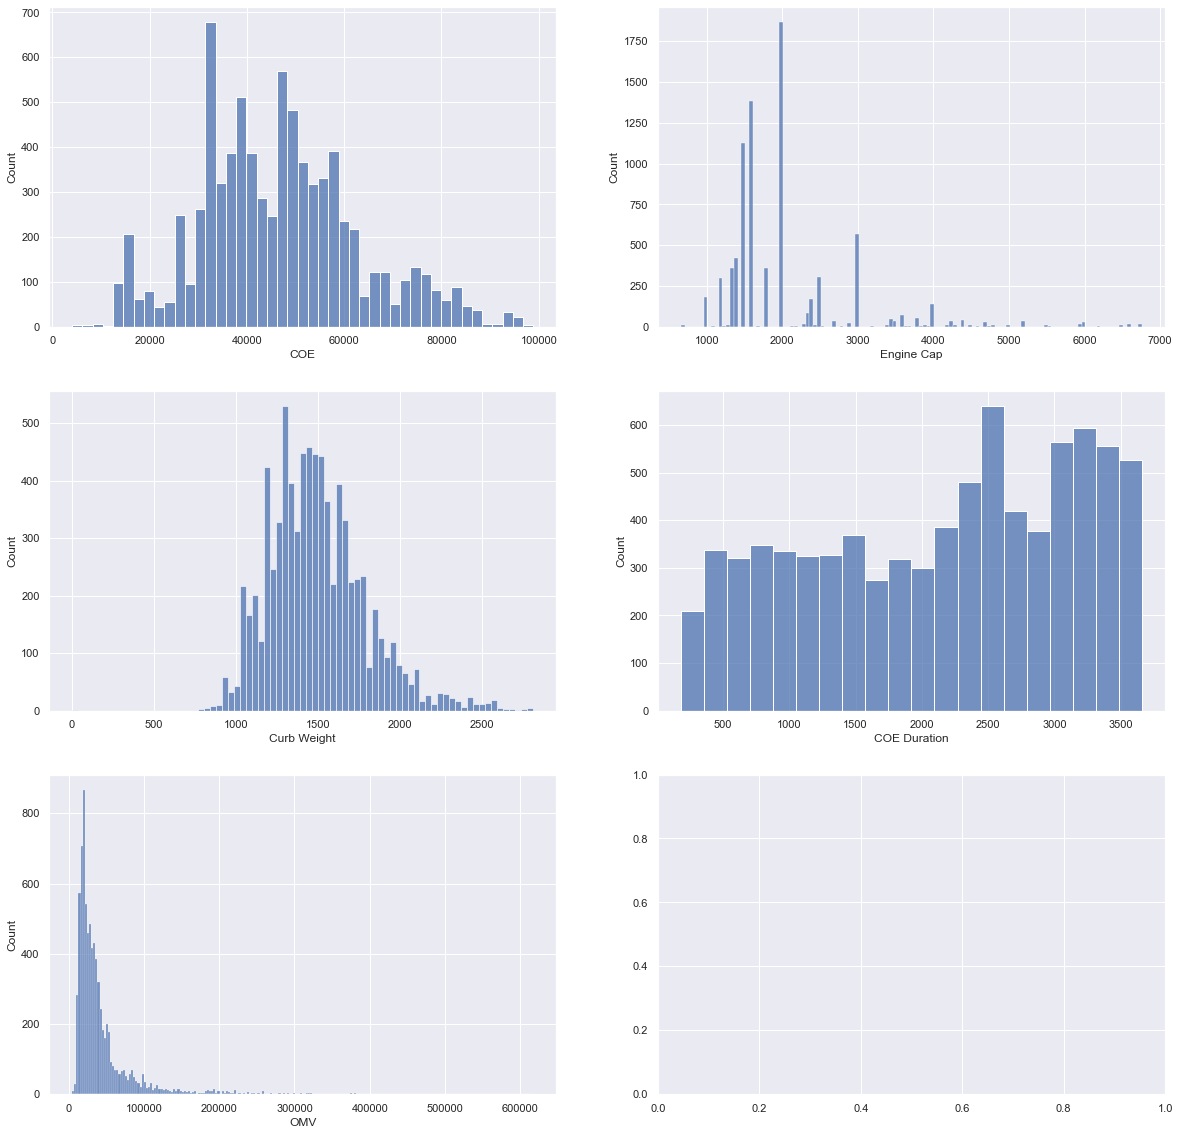

In [18]:
f, axes = plt.subplots(3, 2, figsize=(20, 20))
row = 0
column = 0

for col in hist_plot2:
    if column == 2:
        row += 1
        column = 0
    sb.histplot(data = hist_plot2, x = col, ax = axes[row,column])
    column += 1

Histogram of ARF, Power, No of Owners, Price

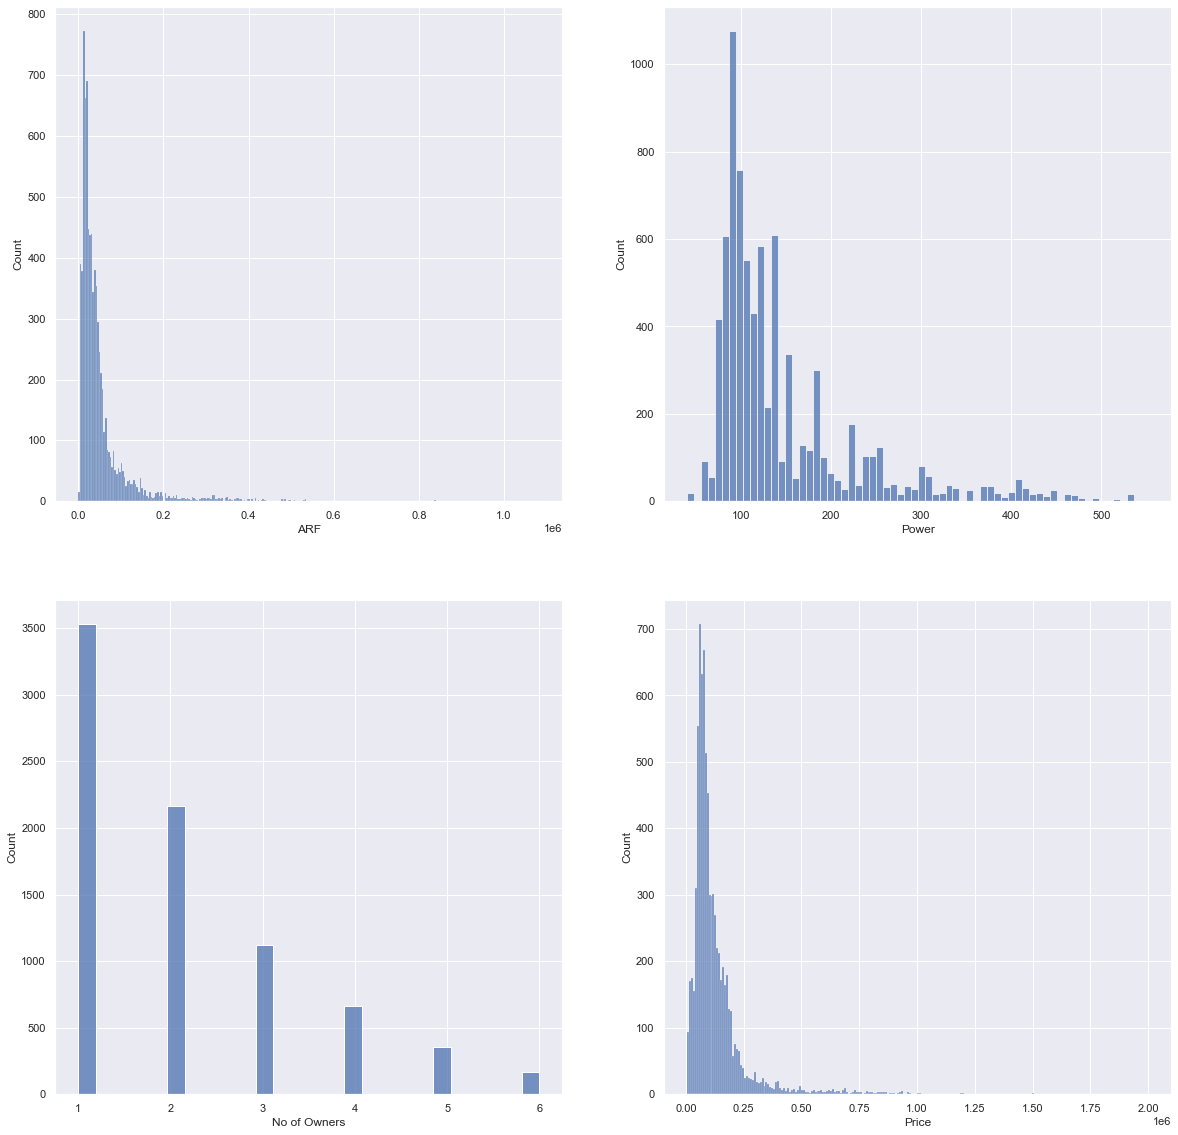

In [19]:
f, axes = plt.subplots(2, 2, figsize=(20, 20))
row = 0
column = 0

for col in hist_plot3:
    if column == 2:
        row += 1
        column = 0
    sb.histplot(data = hist_plot3, x = col, ax = axes[row,column])
    column += 1

As seen, most of our variables, like Price, Power, and Additional Registration Fee are mostly skewed to the left. The only exception is Curb Weight, which has been observed to most resemble a normal distribution curve

### Plotting Correlation Heatmap of Numerical Variables

Correlation Heatmap of CarAge, Depreciation, Mileage and Price

<AxesSubplot:>

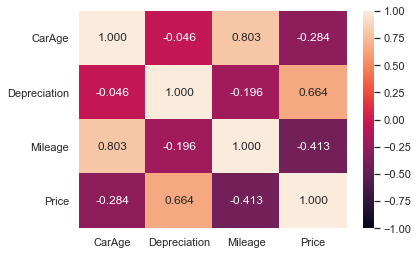

In [20]:
sb.heatmap(plot1.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".3f")

Correlation Heatmap of Road Tax, Dereg Value, COE and Price

<AxesSubplot:>

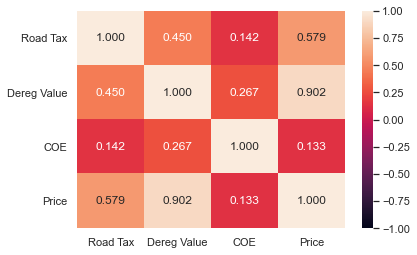

In [21]:
sb.heatmap(plot2.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".3f")

Correlation Heatmap of Engine Cap, Curb Weight, COE Duration and Price

<AxesSubplot:>

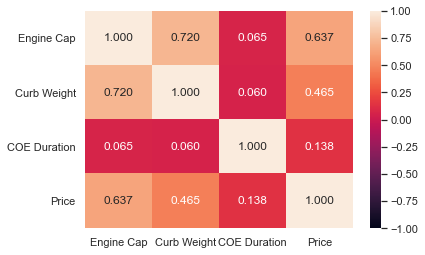

In [22]:
sb.heatmap(plot3.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".3f")

Correlation Heatmap of OMV, ARF and Price

<AxesSubplot:>

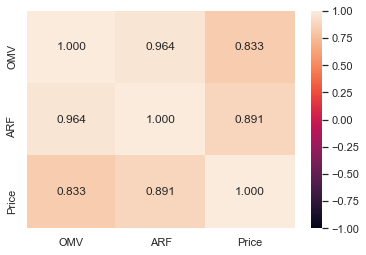

In [23]:
sb.heatmap(plot4.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".3f")

Correlation Heatmap of Power, No of Owners and Price

<AxesSubplot:>

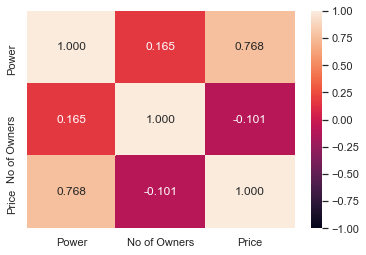

In [24]:
sb.heatmap(plot5.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".3f")

#### Visualising Correlation between Numerical Variables

In [25]:
corr_array = []

for column in array:
    corr_value = df['Price'].corr(df[column])
    if not(column == 'Price'):
        corr_array.append(corr_value)

In [26]:
corr_array = np.sort(corr_array)

In [27]:
print("Most Negative")
print()

for i in corr_array:
    for column in array:
        if i == df['Price'].corr(df[column]):
            print("{:15} : {}".format(column,i))
            
print()
print("Most Positive")

Most Negative

Mileage         : -0.41255382926804646
CarAge          : -0.28367338168923023
No of Owners    : -0.10058341025625646
COE             : 0.13327437395237632
COE Duration    : 0.13815463933262392
Curb Weight     : 0.4651846941430407
Road Tax        : 0.5785260998378585
Engine Cap      : 0.6368406523510629
Depreciation    : 0.663971430592485
Power           : 0.7684549335869106
OMV             : 0.8325997283938046
ARF             : 0.8906229373787757
Dereg Value     : 0.9018352041694141

Most Positive


In [28]:
color_array = []
string_array = []
corr_array = corr_array.tolist()

for i in corr_array:
    for column in array:
        if i == df['Price'].corr(df[column]):
            string_array.append(column)
            if df['Price'].corr(df[column]) < 0:
                color_array.append("red")
                index = corr_array.index(i)
                corr_array[index] = abs(i)
            else:
                color_array.append("green")

In [29]:
df_array = []
df_array.append(string_array)
df_array.append(corr_array)
df_array.append(color_array)

corr_df = pd.DataFrame(df_array).transpose() 
corr_df.columns = ['Column','Corr','Color']
corr_df = corr_df.sort_values('Corr')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

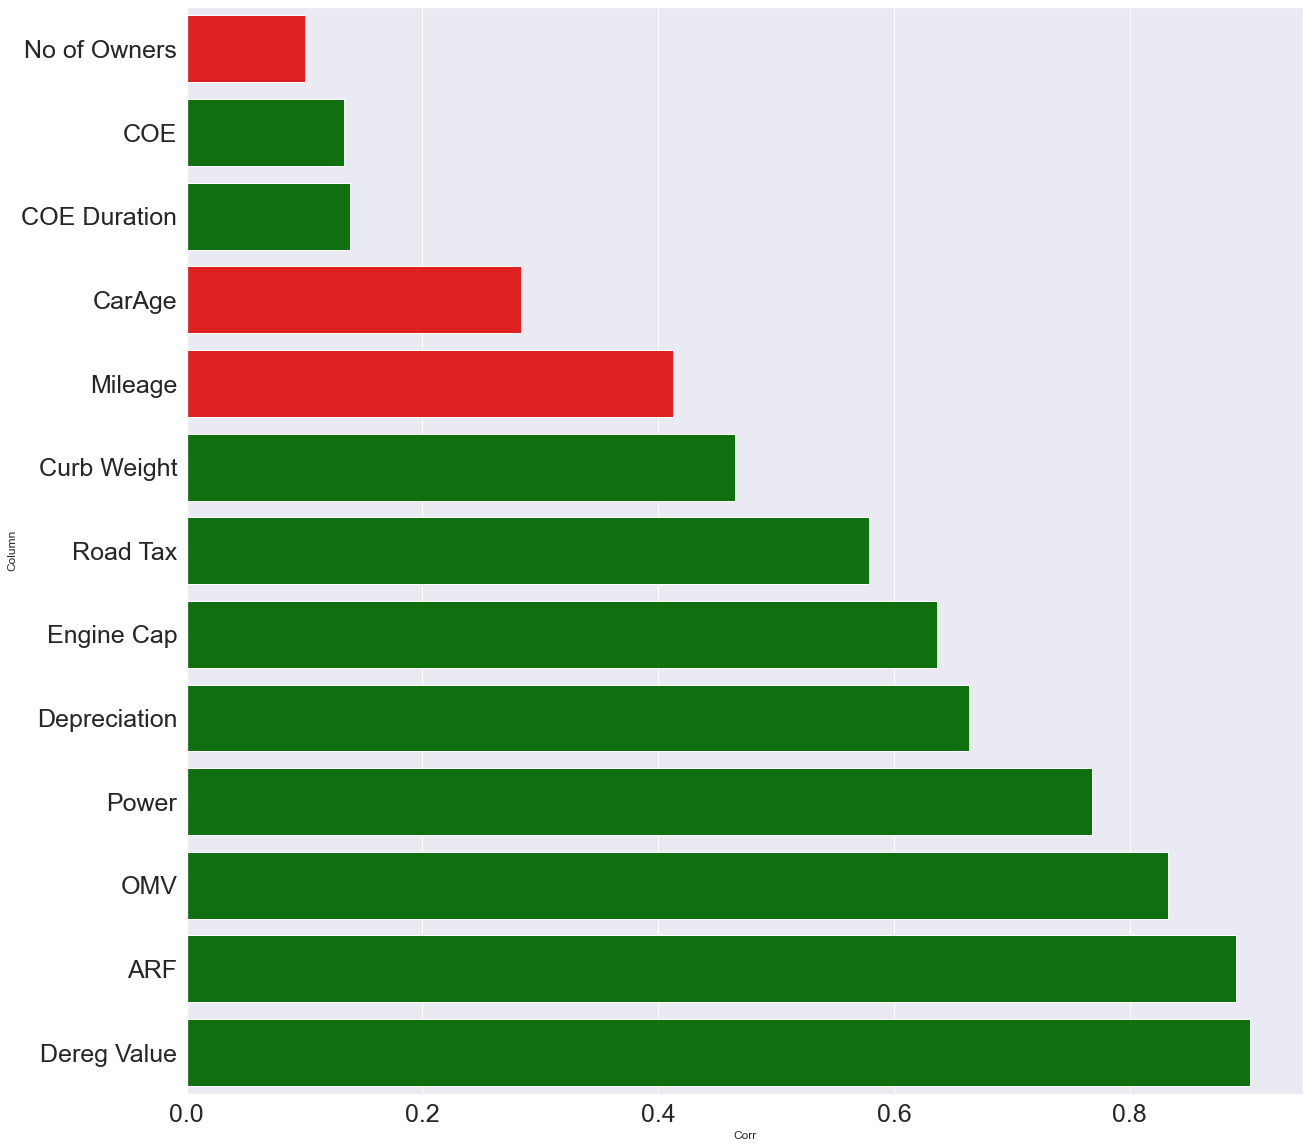

In [30]:
f = plt.figure(figsize=(20, 20))
ax = sb.barplot(x=corr_df['Corr'],y=corr_df['Column'],data=corr_df, palette = corr_df['Color'], orient='h')
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

From the heatmaps and bar chart above, we can infer that the top 5 variables that have the strongest correlation with price are Dereg Value, ARF, OMV, Power, and Depreciation with correlation coefficients of 0.902, 0.891, 0.836, 0.768 and 0.664 respectively. On the other hand, No of Owners, COE and COE Duration have the least correlation with Price.

### EDA of Categorical Variables

In [31]:
cat_df = pd.DataFrame(df[['Type of Vehicle','Transmission']])

In [32]:
for column in cat_df:
    print("Number of levels for {:15} : {}".format(column,len(cat_df[column].unique())))

Number of levels for Type of Vehicle : 8
Number of levels for Transmission    : 2


As seen, there are 8 different types of vehicle, and 2 types of Transmission.  
The respective types of each variable are shown below.

In [33]:
for column in cat_df:
    print("Levels for {}:".format(column))
    print()
    print("\t", end = "")
    for var in cat_df[column].unique():
        print(var, end = ", ")
    print()
    print()

Levels for Type of Vehicle:

	Hatchback, SUV, MPV, Luxury Sedan, Mid-Sized Sedan, Sports Car, Stationwagon, Others, 

Levels for Transmission:

	Auto, Manual, 



In [34]:
for column in cat_df:
    print(column)
    print("----------------------------")
    print("Number of Cars per category:")
    print(cat_df[column].value_counts())
    print()

Type of Vehicle
----------------------------
Number of Cars per category:
Luxury Sedan       1829
SUV                1795
Sports Car         1361
Mid-Sized Sedan    1207
Hatchback           901
MPV                 739
Stationwagon        174
Others                2
Name: Type of Vehicle, dtype: int64

Transmission
----------------------------
Number of Cars per category:
Auto      7852
Manual     156
Name: Transmission, dtype: int64



#### Type of Vehicle EDA

In [35]:
group = df.loc[:,['Type of Vehicle','Price']].groupby(['Type of Vehicle']).median().sort_values(by='Price')

<AxesSubplot:xlabel='Type of Vehicle', ylabel='Price'>

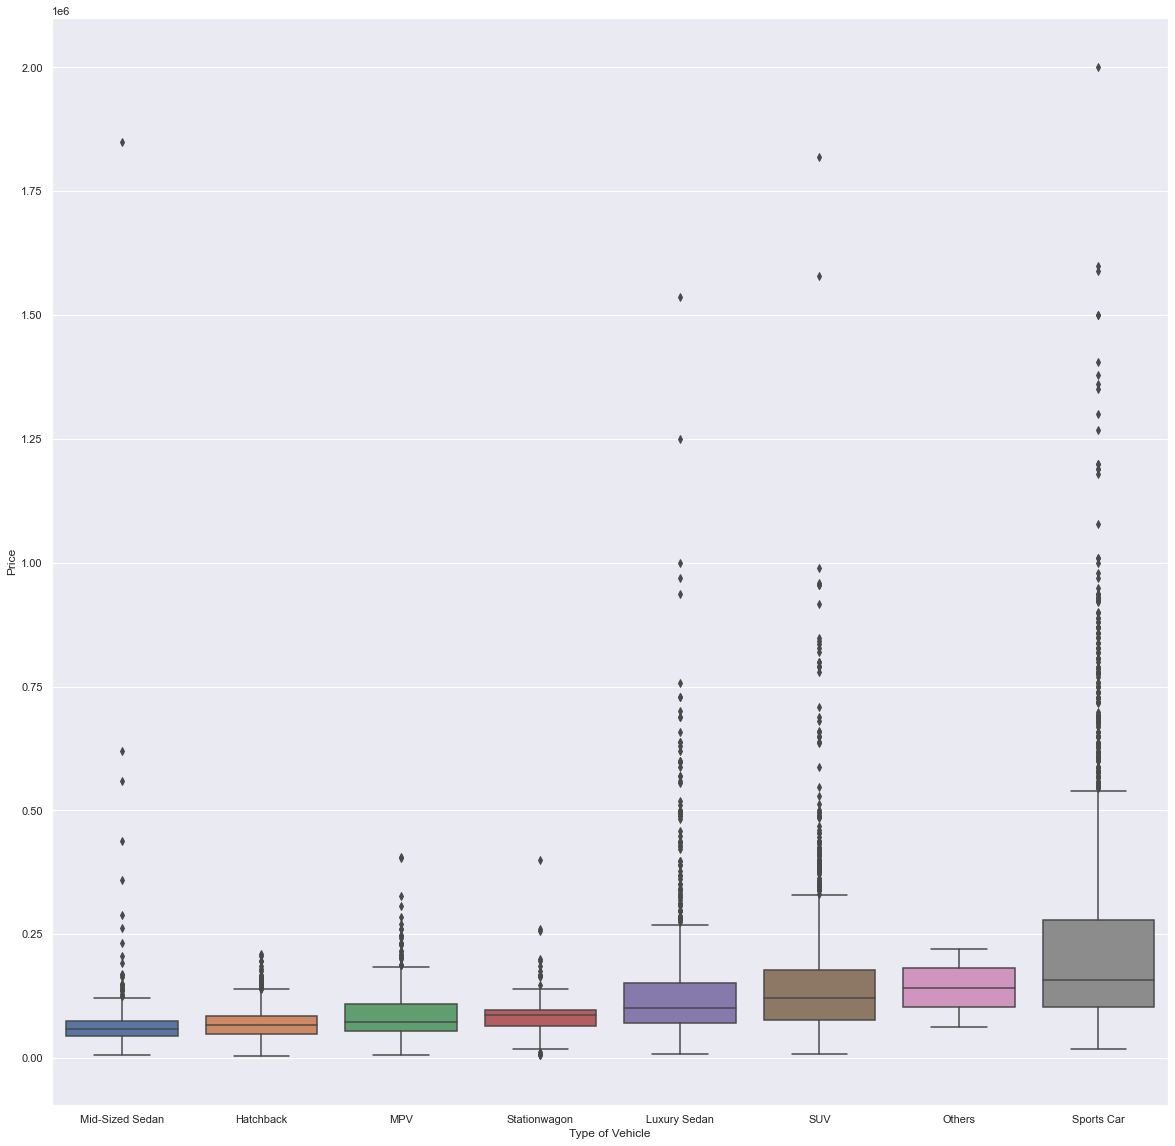

In [36]:
f = plt.figure(figsize=(20, 20))
sb.boxplot(y=df['Price'],x=df['Type of Vehicle'],data=df,order=group.index)

We are going to 'remove' the outliers from the graph to get a better view of the box plots.

<AxesSubplot:xlabel='Type of Vehicle', ylabel='Price'>

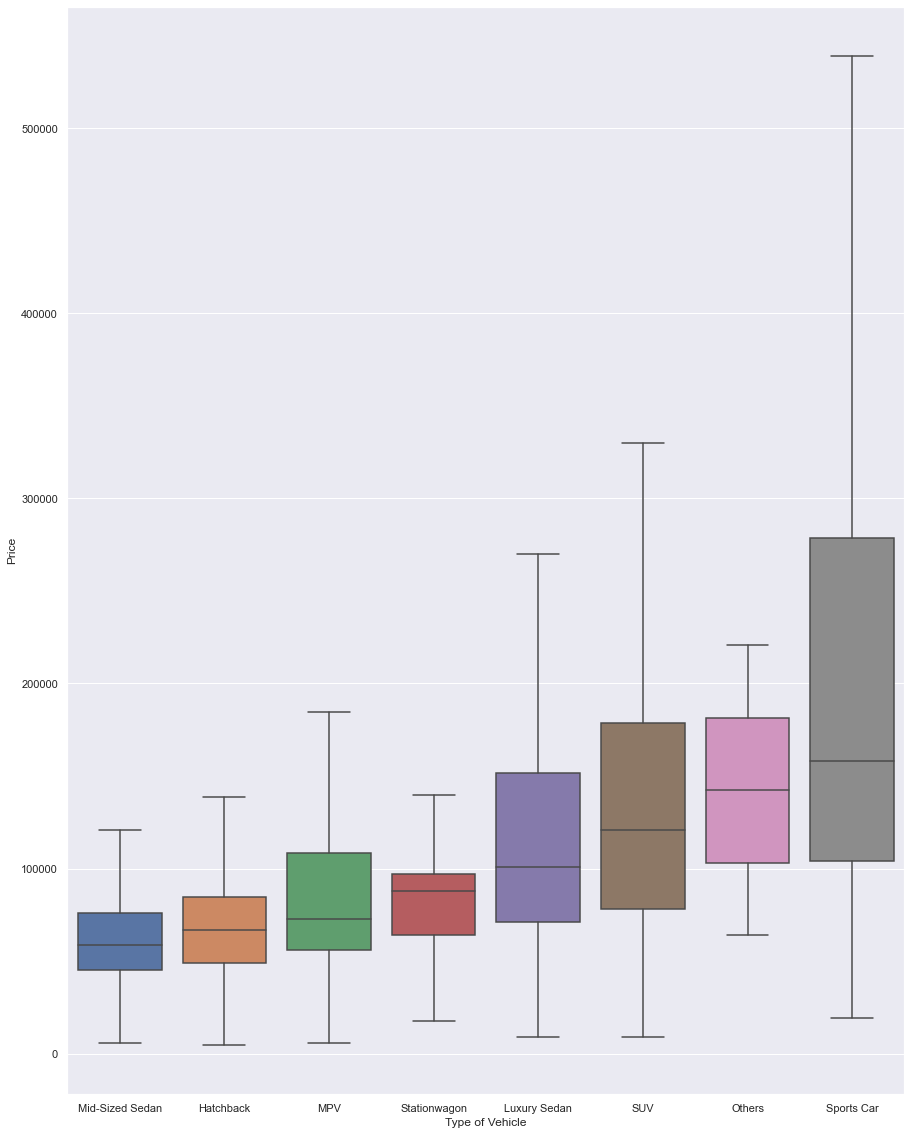

In [37]:
f = plt.figure(figsize=(15, 20)) #Zoom-In Box Plot
sb.boxplot(y=df['Price'],x=df['Type of Vehicle'],data=df,order=group.index,showfliers = False)

#### Transmission EDA

In [38]:
group = df.loc[:,['Transmission','Price']].groupby(['Transmission']).median().sort_values(by='Price')

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

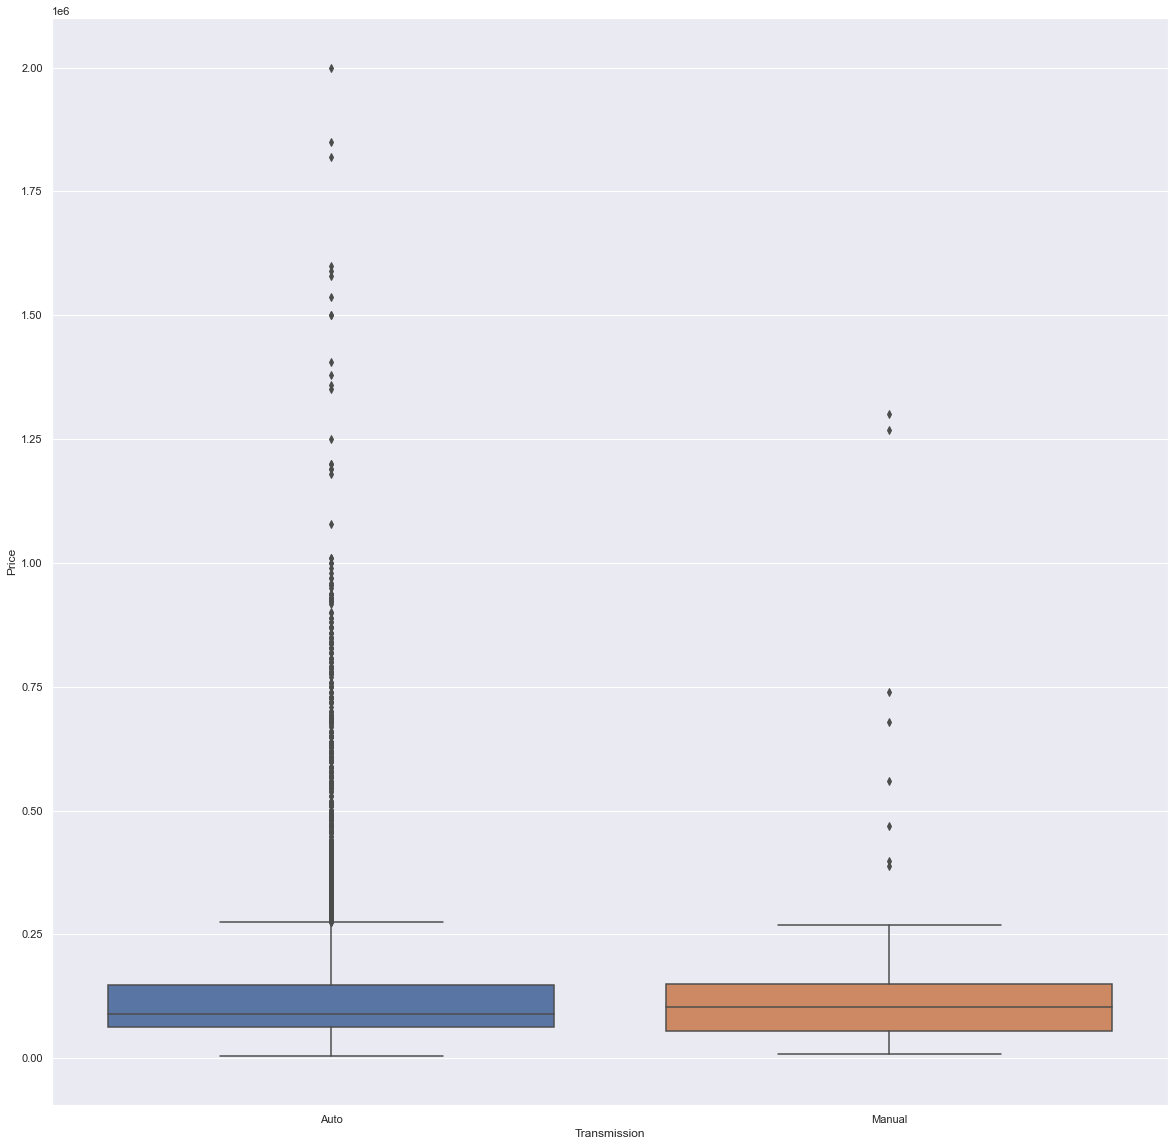

In [39]:
f = plt.figure(figsize=(20, 20))
sb.boxplot(y=df['Price'],x=df['Transmission'],data=df,order=group.index)

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

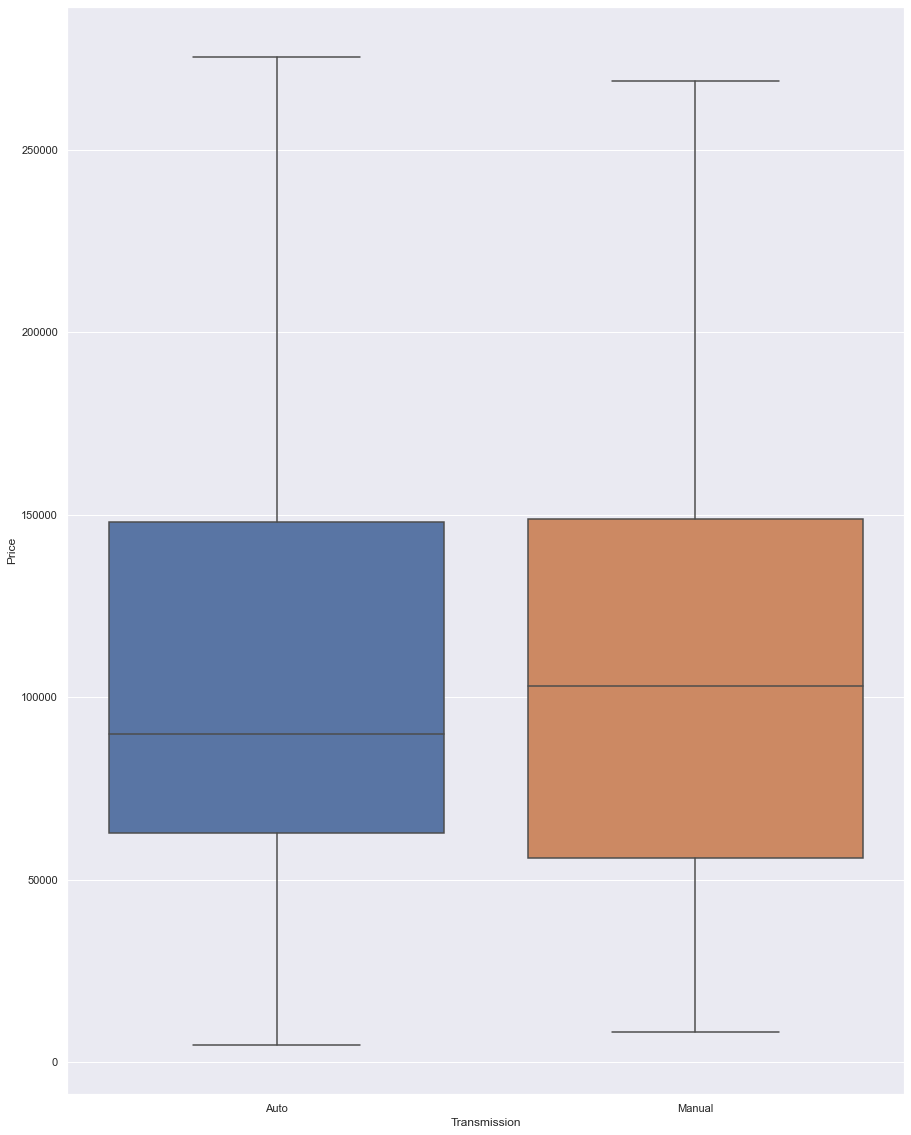

In [40]:
f = plt.figure(figsize=(15, 20))
sb.boxplot(y=df['Price'],x=df['Transmission'],data=df,order=group.index,showfliers = False)

By observing from the box plot based on transmission, we can infer that type of transmission has no effect on the price. 
However, by observing from the box plot based on type of vehicle, we can infer that the type of vehicle does affect the price, where sports car are generally more expensive and mid-sized sedan are generally cheaper.

Hence, we will use type of vehicle in our analysis as a categorical variable.

#### Visualising Correlation between Type of Vehicle & Price statistically

Analysis of variance (ANOVA) is applied to find a statistical difference in means between groups of data. 
In ANOVA, an F-Test is utilised.  
Value of F is determined by variation between means, divided by the variation within each group of data.  
If the value of F is significantly large, or p-value is close to 0, we can conclude that there is a significant difference in means between groups. Thus, this means that there is a correlation between the numerical and categorical variable.

In [41]:
veh_type = pd.DataFrame(df[['Price','Type of Vehicle']])
veh_type = veh_type.rename(columns={'Type of Vehicle' : 'TypeOfVehicle'})

In [42]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Price ~ TypeOfVehicle', veh_type).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                     sum_sq      df           F  PR(>F)
TypeOfVehicle  2.910049e+13     7.0  253.148661     0.0
Residual       1.313762e+14  8000.0         NaN     NaN


We can observe that p-value ~ 0. Hence, we can infer that there is a relationship between 'Type of Vehicle' and 'Price'

Reference: https://blog.minitab.com/en/adventures-in-statistics-2/understanding-analysis-of-variance-anova-and-the-f-test

## Modeling a Multi-Variate Linear Regression to Predict Price

We are going to use 6 variables for our multi-variate linear regression. The 5 numerical variables, which have the strongest correlation with Price, namely, Dereg Value, ARF, OMV, Power, and Depreciation, will be selected.  
The categorical variable, 'Type of Vehicle' will also be included, as it is observed that it has a moderately high correlation with Price.

In [43]:
linreg_df = pd.DataFrame(df[['Dereg Value','ARF','OMV','Depreciation','Power','Type of Vehicle']])
y_df = pd.DataFrame(df[['Price']])

We are applying one-hot encoding on the categorical variable 'Type of Vehicle'.

In [44]:
df_dummy = pd.get_dummies(linreg_df["Type of Vehicle"])
linreg_df = pd.concat([linreg_df, df_dummy], axis = 1)
linreg_df = linreg_df.drop(['Type of Vehicle', 'Others'], axis = 'columns')

In [45]:
linreg_df.head()

,Dereg Value,ARF,OMV,Depreciation,Power,Hatchback,Luxury Sedan,MPV,Mid-Sized Sedan,SUV,Sports Car,Stationwagon
0,44075,25704,24074,14120,140.0,1,0,0,0,0,0,0
1,115977,128573,86985,27100,225.0,0,0,0,0,1,0,0
2,54933,45298,38070,22680,187.0,0,0,0,0,1,0,0
3,21727,22387,22387,10580,105.0,0,0,1,0,0,0,0
4,40187,24968,23548,13290,110.0,0,1,0,0,0,0,0


### Linear Regression Model

Splitting the data points

In [46]:
from sklearn.model_selection import train_test_split

X, x_test, Y, y_test=train_test_split(linreg_df, y_df, test_size=0.20,random_state=1)

Cross-Validation of Models

In [47]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

kf=KFold(n_splits=4,shuffle=True,random_state=1)
linreg=LinearRegression()
train_index_list=[]
test_index_list=[]
mse=[]
i=1
for train_index, test_index in kf.split(X.index):
    train_index_list.append(train_index)
    test_index_list.append(test_index)
    X_train,X_validate,Y_train,Y_validate=X[X.index.isin(train_index)],X[X.index.isin(test_index)],Y[Y.index.isin(train_index)],Y[Y.index.isin(test_index)]
    linreg.fit(X_train,Y_train)
    Y_test_pred=linreg.predict(X_validate)
    mse.append(mean_squared_error(Y_validate,Y_test_pred))
    print("Mean Squared Error for Model ",i,": ",mse[i-1])
    i=i+1

Mean Squared Error for Model  1 :  1846248944.782082
Mean Squared Error for Model  2 :  1991743587.3619816
Mean Squared Error for Model  3 :  1611892106.7825096
Mean Squared Error for Model  4 :  3429821969.056647


From the cross validation results, Model 3 has the lowest mean squared error. Hence, it is the most appropriate model for testing.

In [48]:
model_train_index=train_index_list[mse.index(min(mse))]
model_test_index=test_index_list[mse.index(min(mse))]
x_train,x_validate,y_train,y_validate=X[X.index.isin(train_index)],X[X.index.isin(test_index)],Y[Y.index.isin(train_index)],Y[Y.index.isin(test_index)]
linreg.fit(x_train,y_train)
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [49206.94786597]
Coefficients of Regression 	: a =  [[ 2.33110316e+00 -1.43131871e+00  2.44254879e+00 -6.46787912e-02
   9.03185689e+01 -8.58492235e+04 -1.11856157e+05 -9.64708782e+04
  -8.01343113e+04 -8.98519658e+04 -7.68870939e+04 -9.65446913e+04]]


,Predictors,Coefficients
0,Dereg Value,2.331103
1,ARF,-1.431319
2,OMV,2.442549
3,Depreciation,-0.064679
4,Power,90.318569
5,Hatchback,-85849.223501
6,Luxury Sedan,-111856.157304
7,MPV,-96470.878192
8,Mid-Sized Sedan,-80134.311346
9,SUV,-89851.965799


Goodness of Fit of Model

In [49]:
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9073848297442975
Mean Squared Error (MSE) 	: 1745863132.0312898

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8989664470785452
Mean Squared Error (MSE) 	: 2246683141.029141



### Visualising the Linear Regression Model

In [50]:
array = []

for index in linreg_df['Dereg Value'].index:
    predicted_price = 0
    i = 0
    for column in linreg_df:
        predicted_price += linreg_df[column].loc[index] * linreg.coef_[0][i]
        i += 1
    predicted_price += linreg.intercept_[0]
    array.append(predicted_price)
    
linreg_df['PredictedPrice'] = array

In [51]:
linreg_df = pd.concat([linreg_df,df['Price']], axis = 1)

In [52]:
linreg_df.head()

,Dereg Value,ARF,OMV,Depreciation,Power,Hatchback,Luxury Sedan,MPV,Mid-Sized Sedan,SUV,Sports Car,Stationwagon,PredictedPrice,Price
0,44075,25704,24074,14120,140.0,1,0,0,0,0,0,0,99843.734789,115800
1,115977,128573,86985,27100,225.0,0,0,0,0,1,0,0,276714.382180,188888
2,54933,45298,38070,22680,187.0,0,0,0,0,1,0,0,130984.086952,170000
3,21727,22387,22387,10580,105.0,0,0,1,0,0,0,0,34821.503977,68888
4,40187,24968,23548,13290,110.0,0,1,0,0,0,0,0,61886.268127,100800


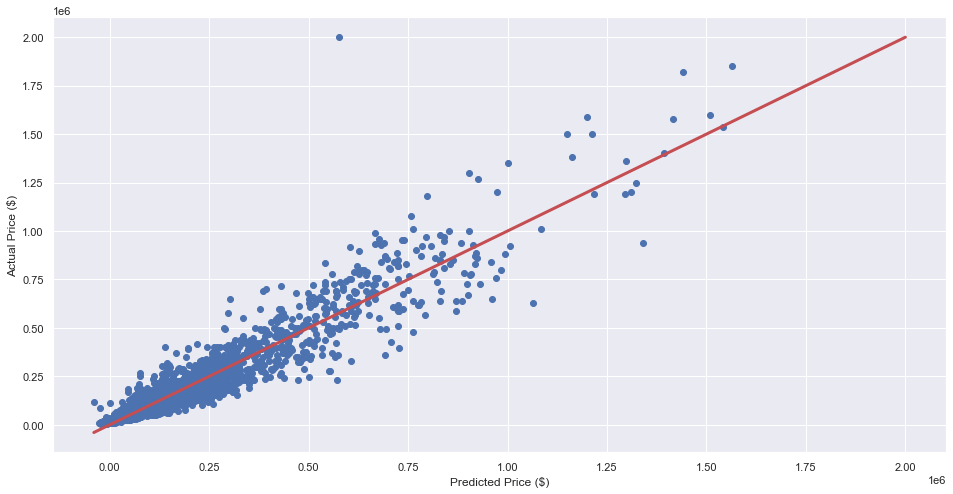

In [53]:
if min(linreg_df['Price']) > min(linreg_df['PredictedPrice']):
    lowest = min(linreg_df['PredictedPrice'])
else:
    lowest = min(linreg_df['Price'])
    
if max(linreg_df['Price']) < max(linreg_df['PredictedPrice']):
    highest = max(linreg_df['PredictedPrice'])
else:
    highest = max(linreg_df['Price'])
    
x = np.linspace(lowest,highest,1000)
y = x

f = plt.figure(figsize=(16, 8))
plt.scatter(linreg_df['PredictedPrice'], linreg_df['Price'])
plt.plot(x, y, 'r-', linewidth = 3)
plt.xlabel("Predicted Price ($)")
plt.ylabel("Actual Price ($)")
plt.show()

Here, the red line represents the points where the predicted price matches the actual price.

As seen from the scatterplot, and goodness of fit, the linear regression can suffice as a model.  
But is there a better model?

##  Something New: Using Random Forest Regression model

Instead of utilising correlation to determine the variables to include in our Regression model, we can use the Random Forest Regression model.  
It is an ensemble technique that utilises multiple decision trees and techniques, known as bagging.  
From the multiple decision trees, it computes the relative importance of each variable through Gini impurity.  
A Regression model is then built based on that computation.

In [54]:
# Adding all numerical and categorical variables in x_tree
x_tree = pd.DataFrame(df[['CarAge','Depreciation', 'Mileage', 'Road Tax', 'Dereg Value', 'COE', 'Engine Cap', 'Curb Weight', 'COE Duration', 'OMV', 'ARF', 'Power', 'No of Owners', 'Type of Vehicle', 'Transmission']])
y_tree = pd.DataFrame(df['Price'])

Instead of performing OneHotEncoder on categorical variables, we will be implementing LabelEncoder, whereby each label within each categorical variable will be assigned an integer.  
This is to prevent sparsity into the dataset, as OneHotEncoding will introduce new categories.

In [55]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

x_tree['Type of Vehicle'] = labelEncoder.fit_transform(x_tree['Type of Vehicle'])
x_tree['Transmission'] = labelEncoder.fit_transform(x_tree['Transmission'])

x_tree.head()

,CarAge,Depreciation,Mileage,Road Tax,Dereg Value,COE,Engine Cap,Curb Weight,COE Duration,OMV,ARF,Power,No of Owners,Type of Vehicle,Transmission
0,990,14120,17000,1176,44075,34000,1969,1454,2662,24074,25704,140.0,1,0,0
1,1973,27100,133000,3376,115977,56956,2993,2183,1678,86985,128573,225.0,2,5,0
2,1281,22680,58000,1176,54933,32311,1969,1841,2371,38070,45298,187.0,1,5,0
3,4928,10580,176000,1674,21727,33377,1986,1560,2376,22387,22387,105.0,4,2,0
4,1227,13290,96775,624,40187,32302,1395,1320,2425,23548,24968,110.0,1,1,0


Splitting the data points

In [56]:
x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(x_tree, y_tree, test_size=0.2, random_state=2)

### Finding the 6 important features for the model
We are going to limit the number of features to 6.

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
rf = RandomForestRegressor(n_estimators=100, random_state=2)
sel = SelectFromModel(rf, max_features = 6, threshold=-np.inf)
sel.fit(x_train_tree, y_train_tree)

C:\Users\user\anaconda3\lib\site-packages\sklearn\feature_selection\_from_model.py:234: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestRegressor(random_state=2), max_features=6,
                threshold=-inf)

In [58]:
selected_feat= x_train_tree.columns[(sel.get_support())]
print(selected_feat)

Index(['CarAge', 'Depreciation', 'Mileage', 'Dereg Value', 'ARF', 'Power'], dtype='object')


[Text(558.0, 978.48, 'Dereg Value <= 171863.0\nmse = 19414994803.92\nsamples = 4057\nvalue = 130797.849'),
 Text(279.0, 761.0400000000001, 'Dereg Value <= 54896.0\nmse = 5479836851.108\nsamples = 3919\nvalue = 109930.259'),
 Text(139.5, 543.6, 'Power <= 296.5\nmse = 2328412293.761\nsamples = 2776\nvalue = 79354.111'),
 Text(69.75, 326.1600000000001, 'Dereg Value <= 40488.5\nmse = 1036061058.147\nsamples = 2697\nvalue = 74263.686'),
 Text(34.875, 108.72000000000003, '\n  (...)  \n'),
 Text(104.625, 108.72000000000003, '\n  (...)  \n'),
 Text(209.25, 326.1600000000001, 'Depreciation <= 55835.0\nmse = 16169886424.992\nsamples = 79\nvalue = 244151.786'),
 Text(174.375, 108.72000000000003, '\n  (...)  \n'),
 Text(244.125, 108.72000000000003, '\n  (...)  \n'),
 Text(418.5, 543.6, 'Depreciation <= 28495.0\nmse = 5360572950.944\nsamples = 1143\nvalue = 184031.653'),
 Text(348.75, 326.1600000000001, 'Dereg Value <= 72230.0\nmse = 1741138042.994\nsamples = 891\nvalue = 163084.999'),
 Text(313.87

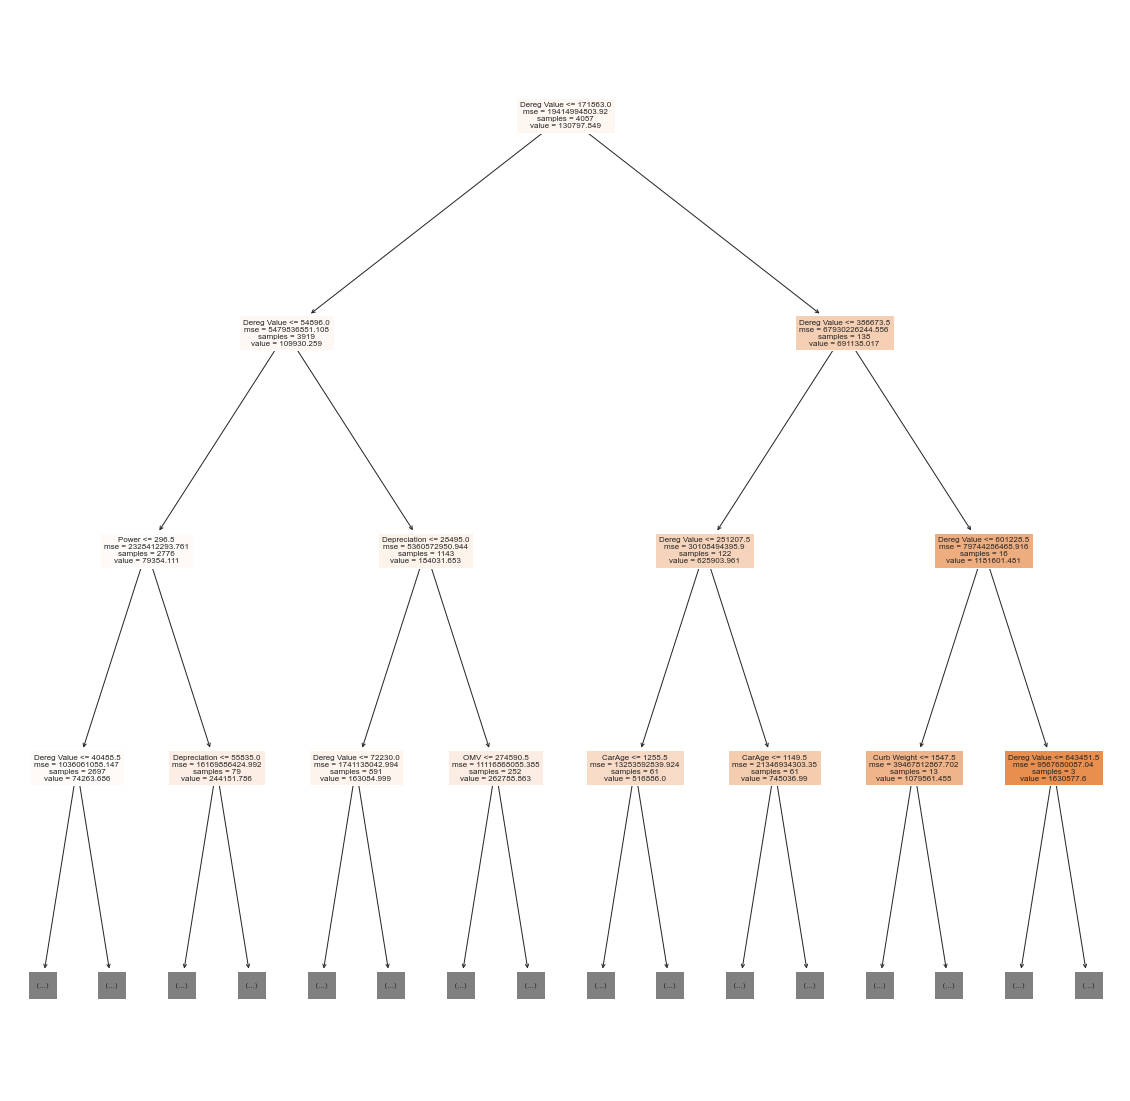

In [59]:
from sklearn import tree

plt.figure(figsize=(20,20))
tree.plot_tree(sel.estimator_.estimators_[0], feature_names=x_train_tree.columns, max_depth = 3, fontsize = 8, filled=True)

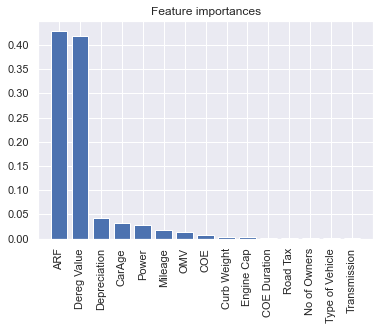

In [60]:
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train_tree.shape[1]), importances[indices],color="b", align="center")
plt.xticks(range(x_train_tree.shape[1]), x_train_tree.columns[indices], rotation=90)
plt.xlim([-1, x_train_tree.shape[1]])
plt.show()

As seen, Additional Registration Fee, Deregistration value, Depreciation, Car Age, Power, and Mileage are the most important features, and we will include them in our Random Forest Regression model.

### Building a Random Forest Regression model based on the 6 features

In [61]:
x_tree = pd.DataFrame(df[selected_feat])
x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(x_tree, y_tree, test_size=0.2, random_state=2)

Cross-validation of models

In [62]:
kf=KFold(n_splits=4,shuffle=True,random_state=1)
train_index_list=[]
test_index_list=[]
mse=[]
i=1
for train_index, test_index in kf.split(x_train_tree.index):
    train_index_list.append(train_index)
    test_index_list.append(test_index)
    X_train,X_validate,Y_train,Y_validate=x_train_tree[x_train_tree.index.isin(train_index)],x_train_tree[x_train_tree.index.isin(test_index)],y_train_tree[y_train_tree.index.isin(train_index)],y_train_tree[y_train_tree.index.isin(test_index)]
    rf.fit(X_train,Y_train)
    Y_test_pred=rf.predict(X_validate)
    mse.append(mean_squared_error(Y_validate,Y_test_pred))
    print("Mean Squared Error for Model ",i,": ",mse[i-1])
    i=i+1

<ipython-input-62-75b4af2a16ab>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


Mean Squared Error for Model  1 :  392138315.1145675


<ipython-input-62-75b4af2a16ab>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


Mean Squared Error for Model  2 :  480022864.7161885


<ipython-input-62-75b4af2a16ab>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


Mean Squared Error for Model  3 :  567697786.6206431


<ipython-input-62-75b4af2a16ab>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


Mean Squared Error for Model  4 :  2143119621.5668766


From the cross validation results, Model 4 has the lowest mean squared error. Hence, it is the most appropriate model for testing.

In [63]:
model_train_index=train_index_list[mse.index(min(mse))]
model_test_index=test_index_list[mse.index(min(mse))]
x_train,x_validate,y_train,y_validate=x_train_tree[x_train_tree.index.isin(train_index)],x_train_tree[x_train_tree.index.isin(test_index)],y_train_tree[y_train_tree.index.isin(train_index)],y_train_tree[y_train_tree.index.isin(test_index)]
rf.fit(x_train,y_train)

<ipython-input-63-8c48aa4a01a2>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestRegressor(random_state=2)

Goodness of fit of model

In [64]:
y_train_pred_tree = rf.predict(x_train_tree)
y_test_pred_tree = rf.predict(x_test_tree)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rf.score(x_train_tree, y_train_tree))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_tree, y_train_pred_tree))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rf.score(x_test_tree, y_test_tree))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_tree, y_test_pred_tree))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9719459101007526
Mean Squared Error (MSE) 	: 564186658.0632827

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9804708317068638
Mean Squared Error (MSE) 	: 385799911.30811703



### Visualising the Model

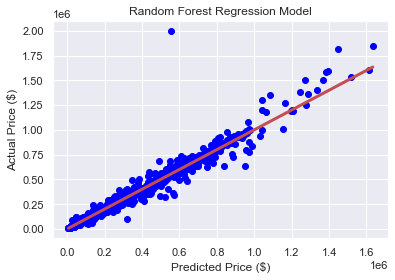

In [65]:
pred_price = rf.predict(x_tree)
plt.scatter(y=y_tree,x=pred_price, color = 'blue')
plt.title('Random Forest Regression Model')
x = np.linspace(min(pred_price),max(pred_price),1000)
y = x
plt.plot(x, y, 'r-', linewidth = 3)
plt.xlabel("Predicted Price ($)")
plt.ylabel("Actual Price ($)")
plt.show()

From the results obtained in the linear regression modelled by correlation between variables and the linear regression modelled by random forest, there is a significantly lower MSE on the test data when the random forest was used. Hence, we will be using the linear regression modelled by random forest in our subsequent analysis.

###  Gaining Insight from the Model

As seen above, there are some outliers in the graph. Thus, we are going to compute the residuals of each data point, and find the outliers.

In [66]:
residual_array = []

for index in y_tree.index:
    residual = abs(y_tree['Price'].loc[index] - pred_price[index])
    residual_array.append(residual)
    
x_tree['Residual'] = residual_array

We are going to find a few data points that are the furthest away from the Regression line.

In [67]:
residual_array.sort()
for x in residual_array[:-10:-1]:
    for index in x_tree['Residual'].index:
        if x == x_tree['Residual'].loc[index]:
            print(df['CarName'].loc[index])

Ferrari 599 GTO
Rolls-Royce Cullinan 6.75A
Rolls-Royce Ghost EWB
Ferrari F8 Tributo
Porsche 911 Speedster 4.0M
Bentley Flying Spur 6.0A W12
Ferrari F8 Tributo
BMW M Series M3 Coupe Competition Package
Rolls-Royce Phantom


There is a similarity between the data points that deviate furthest away from the Regression Line.
These cars are made from exquisite car brands, like Rolls-Royce and Ferrari.  
Hence, we predict that the type of car brand may affect the car price as some car brand titles are more famous and exotic than the others.

## Taking Car Brand into the equation

Extracting Car Brand from 'CarName' column

In [68]:
array = []

for name in df['CarName']:
    temp = name.split()[0]
    if not(temp in array):
        array.append(temp)
        
array

['Volvo',
 'Land',
 'Toyota',
 'Audi',
 'Mazda',
 'Mercedes-Benz',
 'Suzuki',
 'Volkswagen',
 'Porsche',
 'Honda',
 'BMW',
 'Lexus',
 'Hyundai',
 'Nissan',
 'Kia',
 'Maserati',
 'Mitsubishi',
 'Jeep',
 'Citroen',
 'Subaru',
 'Bentley',
 'Infiniti',
 'MINI',
 'Renault',
 'Ferrari',
 'Ford',
 'Rolls-Royce',
 'Lotus',
 'Peugeot',
 'Chevrolet',
 'Jaguar',
 'Skoda',
 'Mitsuoka',
 'Lamborghini',
 'McLaren',
 'Fiat',
 'Alfa',
 'Aston',
 'Perodua',
 'Opel',
 'SEAT',
 'Daihatsu',
 'Mercedes',
 'Ssangyong',
 'Chery',
 'MG',
 'DS7',
 'Morgan',
 'Proton',
 'Dodge',
 'Saab',
 'Hummer',
 'Maxus',
 'Alpine',
 'Cadillac',
 'Daimler']

Cleaning the array

In [69]:
for name in array:
    if name == 'Land':
        array[array.index('Land')] = 'Land Rover'
    elif name == 'Alfa':
        array[array.index('Alfa')] = 'Alfa Romeo'
    elif name == 'Aston':
        array[array.index('Aston')] = 'Aston Martin'
    elif name == 'Mercedes-Benz':
        array.remove('Mercedes-Benz')

print("Number of Car Brands: ",len(array))

Number of Car Brands:  55


Adding CarBrand Column

In [70]:
brand_array = []

for name in df['CarName']:
    for String in array:
        if String in name:
            brand_array.append(String)
            break

df.insert(df.columns.get_loc('CarAge'), "CarBrand", None)
df['CarBrand'] = brand_array

In [71]:
df['CarBrand'].value_counts()

Mercedes        1281
BMW             1003
Toyota           959
Honda            906
Volkswagen       436
Audi             428
Porsche          321
Mazda            289
Nissan           266
Kia              249
Hyundai          246
Mitsubishi       199
Subaru           166
MINI             142
Lexus            136
Volvo            113
Maserati          93
Bentley           87
Suzuki            75
Jaguar            57
Land Rover        53
Skoda             42
Ferrari           42
Lamborghini       40
Chevrolet         39
Ford              32
Rolls-Royce       32
Infiniti          31
Peugeot           30
Citroen           28
Aston Martin      22
Renault           22
Opel              21
SEAT              18
McLaren           18
MG                12
Perodua           11
Daihatsu          11
Alfa Romeo        10
Jeep               9
Ssangyong          7
Proton             3
Saab               3
Chery              3
Hummer             2
Mitsuoka           2
Fiat               2
Morgan       

### Visualising Correlation between CarBrand & Price statistically

In [72]:
model = ols('Price ~ CarBrand', df).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                sum_sq      df           F  PR(>F)
CarBrand  9.191100e+13    54.0  197.423117     0.0
Residual  6.856566e+13  7953.0         NaN     NaN


### CarBrand EDA

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),
 [Text(0, 0, 'Chery'),
  Text(1, 0, 'Proton'),
  Text(2, 0, 'Perodua'),
  Text(3, 0, 'Chevrolet'),
  Text(4, 0, 'Daihatsu'),
  Text(5, 0, 'Suzuki'),
  Text(6, 0, 'Mitsubishi'),
  Text(7, 0, 'Nissan'),
  Text(8, 0, 'Kia'),
  Text(9, 0, 'Mazda'),
  Text(10, 0, 'Saab'),
  Text(11, 0, 'Hyundai'),
  Text(12, 0, 'Citroen'),
  Text(13, 0, 'Toyota'),
  Text(14, 0, 'Subaru'),
  Text(15, 0, 'Ssangyong'),
  Text(16, 0, 'Opel'),
  Text(17, 0, 'Honda'),
  Text(18, 0, 'Ford'),
  Text(19, 0, 'Volkswagen'),
  Text(20, 0, 'Dodge'),
  Text(21, 0, 'Peugeot'),
  Text(22, 0, 'Daimler'),
  Text(23, 0, 'Jeep'),
  Text(24, 0, 'Mitsuoka'),
  Text(25, 0, 'MINI'),
  Text(26, 0, 'SEAT'),
  Text(27, 0, 'Audi'),
  Text(28, 0, 'Infiniti'),
  Text(29, 0, 'Renault'),
 

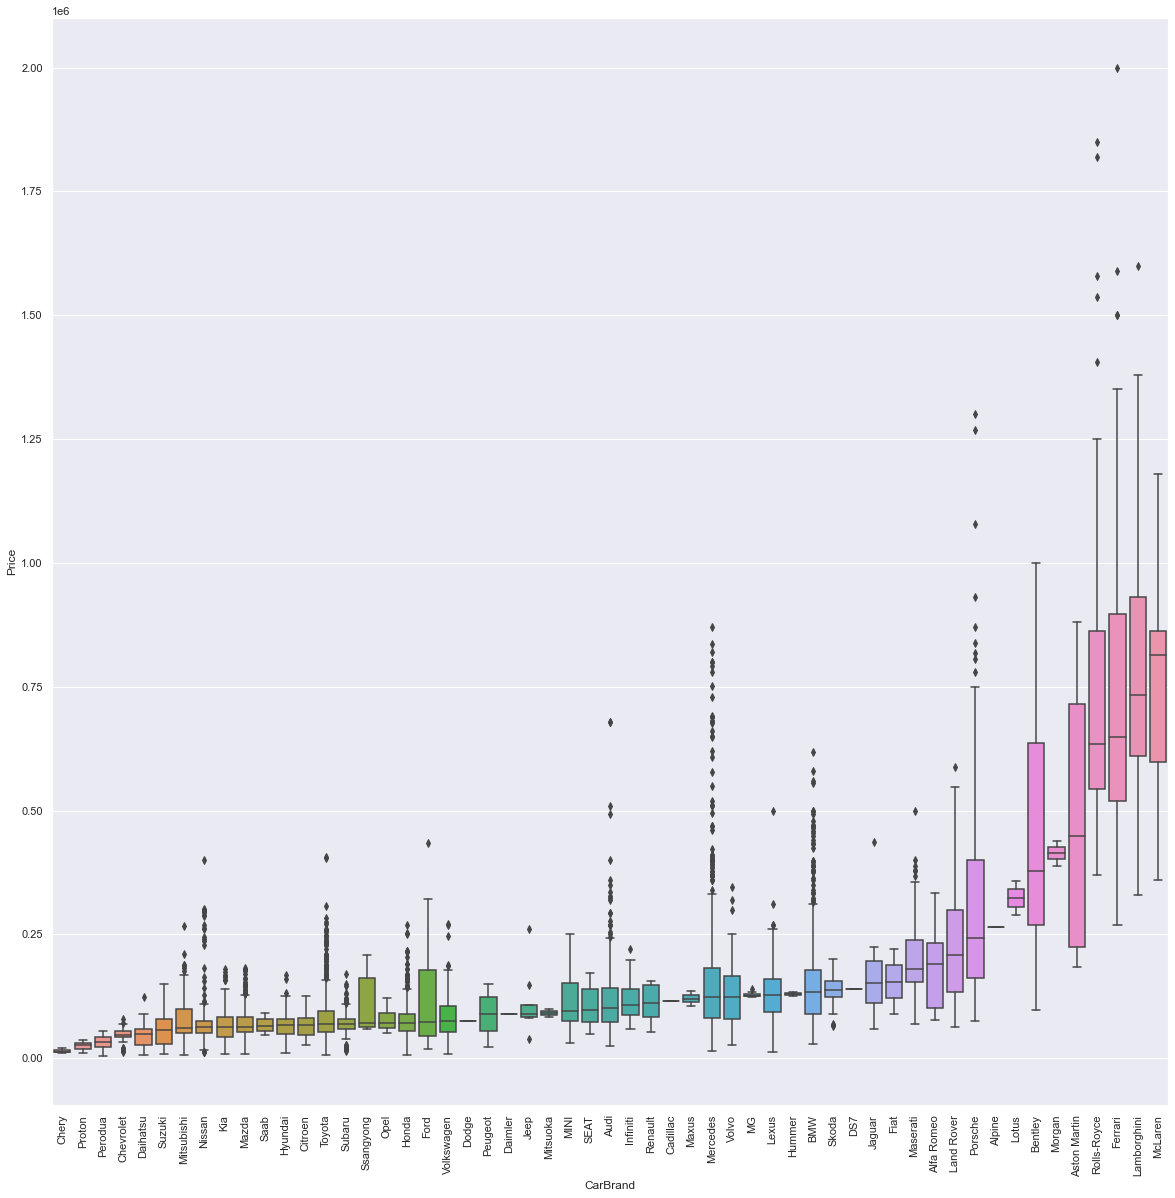

In [73]:
group = df.loc[:,['CarBrand','Price']].groupby(['CarBrand']).median().sort_values(by='Price')
f = plt.figure(figsize=(20, 20))
ax = sb.boxplot(y=df['Price'],x=df['CarBrand'],data=df,order=group.index)
plt.xticks(rotation=90)

As seen from the boxplot, we can observe that there is some relationship between price and car brand.

### Visualising the Deviation across CarBrands statistically

To give an idea on how it will affect the price, we are going to compute the deviation of price across car brands and plot the divergent bar, for visualisation.

In [74]:
x_tree = x_tree.drop(columns=['Residual'])
pred_price = rf.predict(x_tree)
x_tree = pd.concat([df['CarBrand'], x_tree], axis = 1)
x_tree = pd.concat([df['Price'], x_tree], axis = 1)

car_residual_dict = { brand : 0 for brand in x_tree['CarBrand'].unique()}
car_number_dict = { brand : 0 for brand in x_tree['CarBrand'].unique()}

for index in x_tree['CarBrand'].index:
    residual = x_tree['Price'].loc[index] - pred_price[index]
    car_residual_dict[x_tree['CarBrand'].loc[index]] += residual
    car_number_dict[x_tree['CarBrand'].loc[index]] += 1

for string in car_residual_dict:
    car_residual_dict[string] = car_residual_dict[string] / car_number_dict[string]

In [75]:
string_array = []
float_array = []

for string in car_residual_dict:
    string_array.append(string)
    float_array.append(car_residual_dict[string])
    
sorted_array = np.sort(float_array)

print("Most Negative")
print()

for num in sorted_array:
    index = float_array.index(num)
    print("{:15} : {:.2f}".format(string_array[index],float_array[index]))

print()
print("Most Positive")

Most Negative

Aston Martin    : -29620.69
Bentley         : -24241.92
Mitsuoka        : -16787.45
Maxus           : -5971.57
Jaguar          : -5479.93
Maserati        : -4013.10
Infiniti        : -3298.04
Land Rover      : -3012.04
Perodua         : -2923.76
Proton          : -2756.75
Renault         : -2616.49
DS7             : -2247.98
Chevrolet       : -1865.36
Lexus           : -1256.62
Citroen         : -1222.48
SEAT            : -1021.43
Saab            : -887.45
BMW             : -797.83
Skoda           : -648.14
Peugeot         : -602.85
Audi            : -513.16
Volvo           : -478.23
Mazda           : -433.88
Opel            : -377.31
Toyota          : -358.68
Chery           : -238.93
Hyundai         : -162.32
Nissan          : -87.61
Volkswagen      : -63.39
Kia             : -13.25
Mercedes        : 23.32
Honda           : 51.28
Alpine          : 62.56
Dodge           : 102.36
Ford            : 126.18
Jeep            : 251.10
Mitsubishi      : 311.24
Suzuki          :

### Visualising the Deviations across CarBrands using Divergent Bar Chart

In [76]:
plot_df = pd.DataFrame(list(zip(string_array,float_array)), columns = ['Brand','Deviation'])
plot_df.sort_values('Deviation', inplace=True)
plot_df.reset_index(inplace=True)

In [77]:
array = []

for num in plot_df['Deviation']:
    if num > 0:
        array.append('g')
    else:
        array.append('r')

plot_df['colors'] = array

Text(0.5, 1.0, 'Diverging Bars of Car Brand')

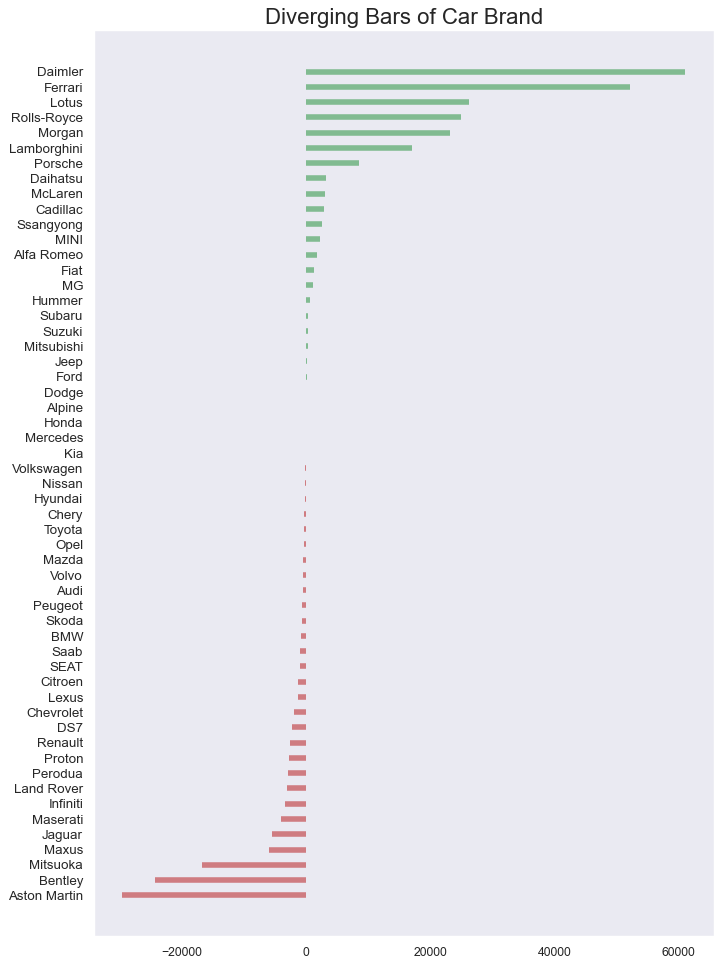

In [78]:
f=plt.figure(figsize=(10,15),dpi=80)

plt.hlines(y=plot_df.index, xmin=0, xmax=plot_df.Deviation, alpha=0.7, linewidth=5, color = plot_df.colors)
plt.yticks(plot_df.index, plot_df.Brand, fontsize=12)
plt.grid(linestyle='--', alpha=0.5)
plt.title('Diverging Bars of Car Brand', fontdict={
          'size': 20})

Conclusion: 

a) How can we predict the price of a car?

We can predict the price of a car by using a regression model with the help of random forest that determines the few most important variables affecting the price.

b) How does brand play a part in affecting car prices?

From the diverging bars obtained, we can conclude that brand does play a  part in affecting car prices to a large extent. Well-known luxury brands like Ferrari, Lotus, Rolls Royce deviate from the typical price by a large positive extent. On the other hand, a brand like British sportscar manufacturer Aston Martin might be less popular in our Singapore society, resulting in Aston Marton pricing their cars less than expected. An interesting insight derived from this analysis is that a sportscar brand like Aston Marton does not necessarily mean the car is overpriced for its given specifications as we need to take into account factors like its deregistration value and power. 

For cars that do not deivate much from the price of a typical car like Honda and Kia, we can also conclude that these brands priced their cars independently of their brand.
 

Future Applications of our model

1) New car brand manufacturers can use the model to guage an appropriate selling price for the car given 
their reputation in the market.

2) Existing car brand maufacturers can use the model to determine if their prices are overvalued or
undervalued relative to other car brands.

3) Customers can use the model to determine their car brand preference to match their status.
